<a href="https://colab.research.google.com/github/ambroz72/Data-analytics-/blob/master/Customer_Churn_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [55]:
data=pd.read_csv('Churn_Modelling.csv')

In [56]:
# checking dataset
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [4]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0
10001,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [5]:
data.shape

(10002, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [7]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10002.000000,1.000200e+04,10002.000000,10001.000000,10002.000000,10002.000000,10002.000000,10001.000000,10001.000000,10002.000000,10002.000000
mean,5001.499600,1.569093e+07,650.555089,38.922311,5.012498,76491.112875,1.530194,0.705529,0.514949,100083.331145,0.203759
std,2887.472338,7.193177e+04,96.661615,10.487200,2.891973,62393.474144,0.581639,0.455827,0.499801,57508.117802,0.402812
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2501.250000,1.562852e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,5001.500000,1.569073e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,7501.750000,1.575323e+07,718.000000,44.000000,7.000000,127647.840000,2.000000,1.000000,1.000000,149383.652500,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [8]:
#checking non unique values
data.nunique()

,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,73
Tenure,11
Balance,6382
NumOfProducts,4


In [9]:
# view all columns
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [10]:
# checking type of data
data.dtypes

,0
RowNumber,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,float64
Tenure,int64
Balance,float64
NumOfProducts,int64


In [11]:
# checking for null values
data.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,1
Gender,0
Age,1
Tenure,0
Balance,0
NumOfProducts,0


In [12]:
data=data.fillna(0)

In [14]:
data.notnull().sum()

,0
RowNumber,10002
CustomerId,10002
Surname,10002
CreditScore,10002
Geography,10002
Gender,10002
Age,10002
Tenure,10002
Balance,10002
NumOfProducts,10002


In [15]:
data[data.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10001,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [16]:
data=data.drop_duplicates()

In [18]:
# Outliers

In [19]:
# Assuming your dataset is named df
numeric_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

outliers_dict = {}

for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = data[(data[col] < lower) | (data[col] > upper)]
    outliers_dict[col] = outliers.shape[0]
    print(f"{col}: {outliers.shape[0]} outliers")

# Optional: View rows with any outliers
# You can choose one column, or merge all


CreditScore: 15 outliers
Age: 360 outliers
Tenure: 0 outliers
Balance: 0 outliers
NumOfProducts: 60 outliers
EstimatedSalary: 0 outliers


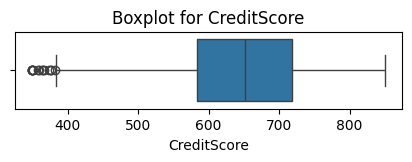

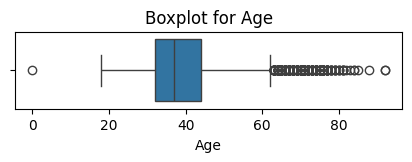

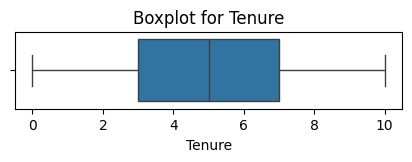

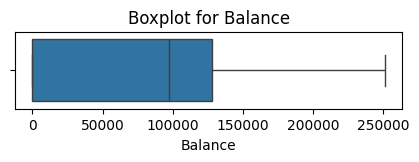

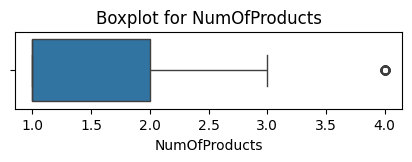

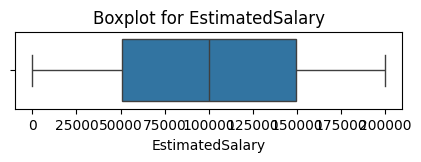

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in numeric_cols:
    plt.figure(figsize=(5, 1))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot for {col}')
    plt.show()


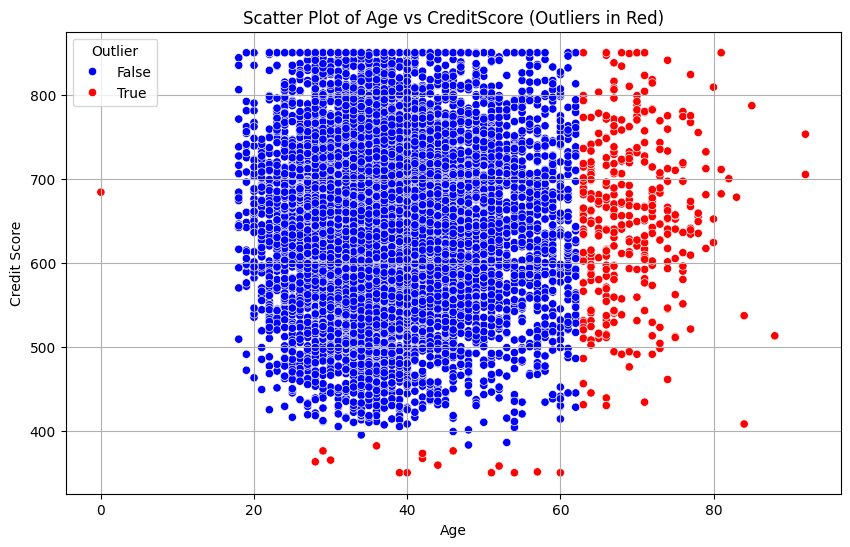

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
# Step 1: Define IQR-based outlier detection function
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data[column] < lower_bound) | (data[column] > upper_bound)

# Step 2: Identify outliers
data['age_outlier'] = find_outliers_iqr(data, 'Age')
data['credit_outlier'] = find_outliers_iqr(data, 'CreditScore')

# Combine both outlier flags
data['combined_outlier'] = data['age_outlier'] | data['credit_outlier']

# Step 3: Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data,
    x='Age',
    y='CreditScore',
    hue='combined_outlier',
    palette={False: 'blue', True: 'red'}
)
plt.title('Scatter Plot of Age vs CreditScore (Outliers in Red)')
plt.xlabel('Age')
plt.ylabel('Credit Score')
plt.legend(title='Outlier')
plt.grid(True)
plt.show()


/tmp/ipython-input-22-3116273469.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Exited', data=data, palette='Set2')


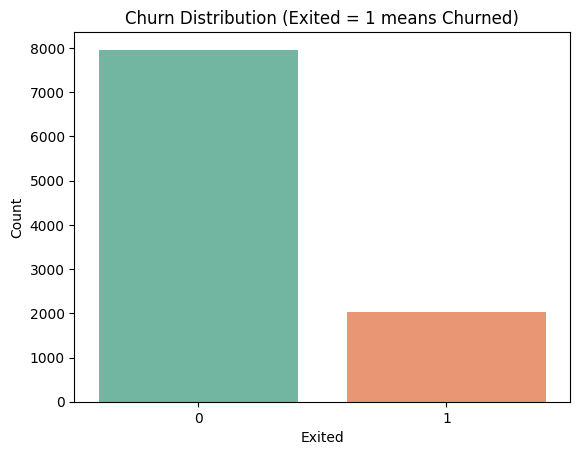

In [22]:
sns.countplot(x='Exited', data=data, palette='Set2')
plt.title('Churn Distribution (Exited = 1 means Churned)')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()


/tmp/ipython-input-23-1152698071.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_churn, x='Gender', y='Exited', palette='Set1')


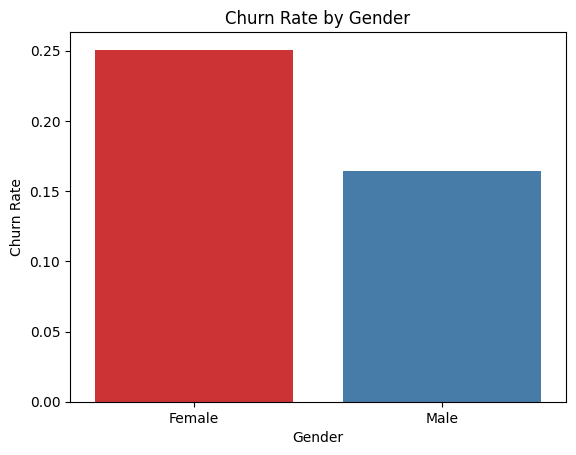

In [23]:
gender_churn = data.groupby('Gender')['Exited'].mean().reset_index()

sns.barplot(data=gender_churn, x='Gender', y='Exited', palette='Set1')
plt.title('Churn Rate by Gender')
plt.ylabel('Churn Rate')
plt.show()


/tmp/ipython-input-24-779336880.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Exited', y='Balance', palette='pastel')


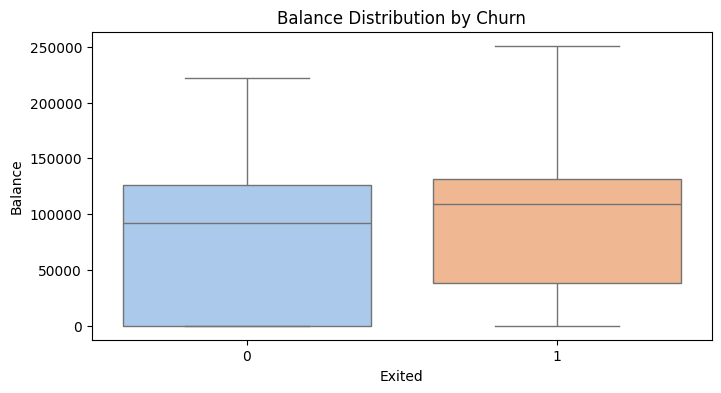

In [24]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=data, x='Exited', y='Balance', palette='pastel')
plt.title('Balance Distribution by Churn')
plt.xlabel('Exited')
plt.ylabel('Balance')
plt.show()


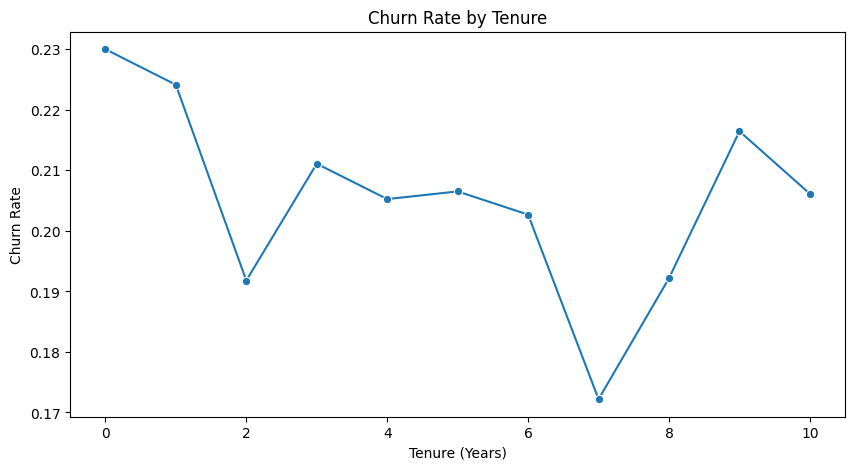

In [25]:
tenure_churn = data.groupby('Tenure')['Exited'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=tenure_churn, x='Tenure', y='Exited', marker='o')
plt.title('Churn Rate by Tenure')
plt.xlabel('Tenure (Years)')
plt.ylabel('Churn Rate')
plt.show()


/tmp/ipython-input-26-1217506740.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_churn, x='NumOfProducts', y='Exited', palette='cool')


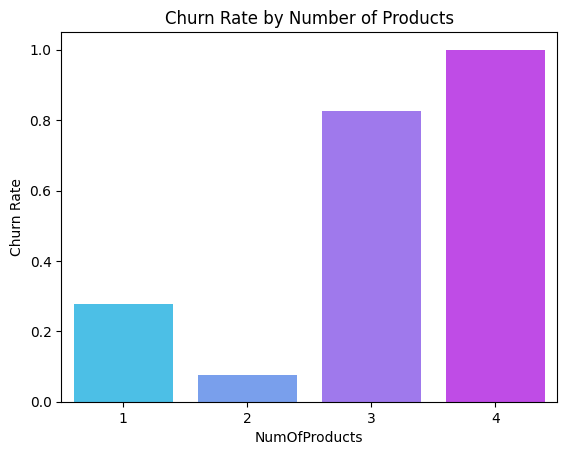

In [26]:
product_churn = data.groupby('NumOfProducts')['Exited'].mean().reset_index()

sns.barplot(data=product_churn, x='NumOfProducts', y='Exited', palette='cool')
plt.title('Churn Rate by Number of Products')
plt.ylabel('Churn Rate')
plt.show()


Feature Engineering


In [27]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'age_outlier',
       'credit_outlier', 'combined_outlier'],
      dtype='object')

In [28]:
# Drop Irrelevant Columns
data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [29]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'age_outlier', 'credit_outlier', 'combined_outlier'],
      dtype='object')

In [30]:
# Create New Features (Binning / Categorization)
# Age Group
bins = [0, 25, 35, 45, 60, 100]
labels = ['<25', '25-35', '35-45', '45-60', '60+']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels)


In [35]:
# balanced category
data['BalanceCategory'] = pd.cut(data['Balance'], bins=[-1, 0, 50000, 100000, 150000, data['Balance'].max()],
                               labels=['Zero', 'Low', 'Medium', 'High', 'Very High'])


In [31]:
# Convert Categorical Variables
#  Label Encoding (for binary columns like Gender)
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})


In [37]:
# One-Hot Encoding (for multi-category columns like Geography, AgeGroup, BalanceCategory)
data = pd.get_dummies(data, columns=['Geography', 'AgeGroup', 'BalanceCategory'], drop_first=True)


In [38]:
# Normalize / Scale Numeric Features
# Recommended for models like Logistic Regression, SVM, KNN (not needed for tree-based models)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

Step-by-Step: Train-Test Split


 Prepare your features and target

In [39]:
# Final Output – Ready for Modeling
# Make sure your target variable is separated:
X = data.drop(columns='Exited')
y = data['Exited']


Summary of Engineered Features:
Feature	Description
AgeGroup	      -   Age binned into categories
BalanceCategory - 	Balance categorized into financial bands
Gender	        -   Encoded as 0/1
Geography_*, AgeGroup_*, etc.	One-hot encoded columns
Scaled numeric columns	- Standardized for better model performance

In [40]:
from sklearn.model_selection import train_test_split

# 80% train, 20% test (commonly used ratio)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # ensures class distribution of target is preserved
)


Check Distribution
Make sure the class balance is preserved

In [41]:
print("Train churn rate:", y_train.mean())
print("Test churn rate:", y_test.mean())


Train churn rate: 0.20375
Test churn rate: 0.2035


You're now ready to train models like Logistic Regression, Random Forest, or XGBoost on X_train, y_train and evaluate on X_test, y_test

Model Building

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [43]:
# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)



LogisticRegression(max_iter=1000)

In [44]:
# Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [45]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [47]:
# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [06:41:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

Compare Performance
Focus on metrics like:

Precision (minimize false positives)

Recall (minimize false negatives)

F1-score (balance between precision and recall)

ROC AUC Score (overall model quality)


In [48]:
models = {
    'Logistic Regression': log_model,
    'Decision Tree': tree_model,
    'Random Forest': rf_model,
    'XGBoost': xgb_model
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n📊 Model: {name}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))



📊 Model: Logistic Regression
[[1537   56]
 [ 275  132]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1593
           1       0.70      0.32      0.44       407

    accuracy                           0.83      2000
   macro avg       0.78      0.64      0.67      2000
weighted avg       0.82      0.83      0.81      2000

ROC AUC Score: 0.7949798797256425

📊 Model: Decision Tree
[[1371  222]
 [ 199  208]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1593
           1       0.48      0.51      0.50       407

    accuracy                           0.79      2000
   macro avg       0.68      0.69      0.68      2000
weighted avg       0.79      0.79      0.79      2000

ROC AUC Score: 0.6858484061873893

📊 Model: Random Forest
[[1531   62]
 [ 224  183]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1593
          

Model Evaluation

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Predictions
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:, 1]

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
cm = confusion_matrix(y_test, y_pred)

# Print results
print("📊 Confusion Matrix:\n", cm)
print("\n📈 Classification Report:\n", classification_report(y_test, y_pred))
print("✔️ Accuracy:", round(accuracy, 3))
print("🎯 Precision:", round(precision, 3))
print("🔁 Recall:", round(recall, 3))
print("📐 F1 Score:", round(f1, 3))
print("🏆 ROC AUC Score:", round(roc_auc, 3))


📊 Confusion Matrix:
 [[1492  101]
 [ 214  193]]

📈 Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90      1593
           1       0.66      0.47      0.55       407

    accuracy                           0.84      2000
   macro avg       0.77      0.71      0.73      2000
weighted avg       0.83      0.84      0.83      2000

✔️ Accuracy: 0.843
🎯 Precision: 0.656
🔁 Recall: 0.474
📐 F1 Score: 0.551
🏆 ROC AUC Score: 0.834


 Model Interpretation


SHAP (SHapley Additive exPlanations)
SHAP is a more advanced and individual prediction explanation tool.

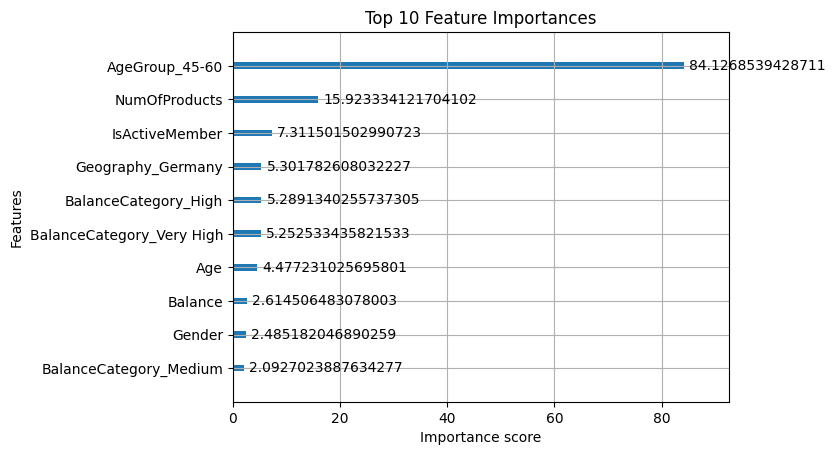

In [52]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(xgb_model, importance_type='gain', max_num_features=10)
plt.title("Top 10 Feature Importances")
plt.show()


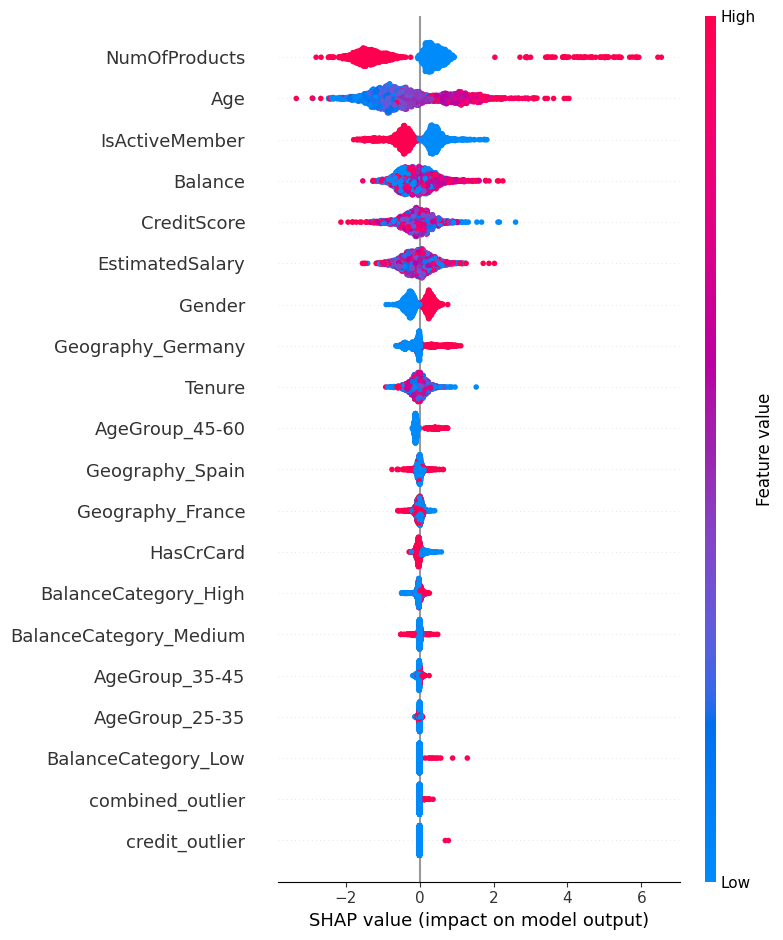

In [53]:
import shap

# Initialize JS visualization (for Jupyter)
shap.initjs()

# Use TreeExplainer for tree-based models like XGBoost
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# Summary plot (global feature importance)
shap.summary_plot(shap_values, X_test)

# Force plot for a single prediction (optional)
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])


Why SHAP Matters:
SHAP Output	Insight Provided
Summary Plot	Overall impact, direction (positive/negative)
Force Plot	How each feature pushed one prediction
Dependence Plot	Shows interaction of one feature with prediction

Profile High-Risk Customers -
Use your model’s predictions (e.g., model.predict_proba) to identify customers with high churn probabilities.

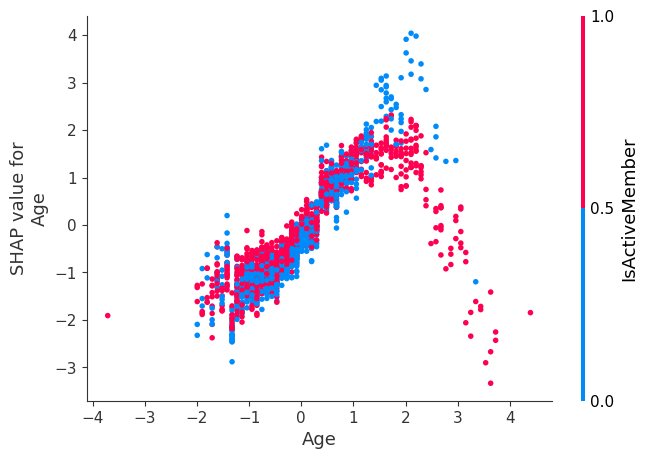

In [54]:
shap.dependence_plot("Age", shap_values, X_test)
